<h1>영상 변환</h1>

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/swkim01/DSAC5/blob/main/gg-09-영상_변환.ipynb"><img src="https://github.com/swkim01/DSAC5/raw/main/colab_logo_32px.png" />구글 코랩에서 실행</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/swkim01/DSAC5/blob/main/gg-09-영상_변환.ipynb"><img src="https://github.com/swkim01/DSAC5/raw/main/GitHub-Mark-32px.png" />깃헙에서 소스 보기</a>
  </td>
</table>

시작전에 sdk.png를 코랩 환경의 '/content/sample_data'에 업로드해준다.

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   131  100   131    0     0    723      0 --:--:-- --:--:-- --:--:--   723
100 70654  100 70654    0     0   296k      0 --:--:-- --:--:-- --:--:--  296k


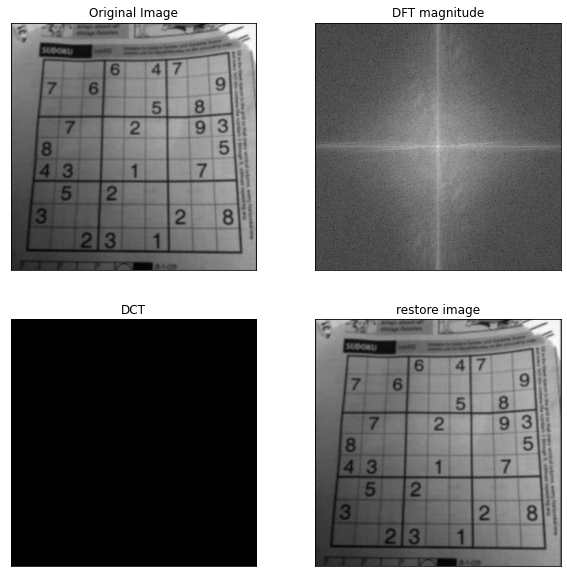

In [28]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
# 이미지 읽기
!curl -L https://github.com/swkim01/DSAC5/raw/main/data/sdk.png -o sdk.png
img = cv.imread('./sdk.png',0)
#img = cv.imread('/content/sample_data/sdk.png',0)
img = img / 255

# DFT
fft = cv.dft(img, flags=cv.DFT_COMPLEX_OUTPUT)

# spectrum visualization
shifted = np.fft.fftshift(fft, axes=[0,1])
magnitude = cv.magnitude(shifted[:,:,0], shifted[:,:,1])
magnitude = np.log(magnitude)

# DCT
h, w = img.shape
if h % 2 == 1: h += 1
if w % 2 == 1: w += 1
dct = cv.dct(cv.resize(img, (w, h)))
#print(np.abs(dct*10).astype(np.uint8))

# restore
restore = cv.idft(fft, flags=cv.DFT_SCALE | cv.DFT_REAL_OUTPUT)

titles = ['Original Image', 'DFT magnitude', 'DCT', 'restore image']
images = [img, magnitude, np.abs(dct*10), restore]
fig, ax = plt.subplots(2, 2, figsize=(10,10))
for i in range(4):
    #plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    #plt.title(titles[i])
    #plt.xticks([]),plt.yticks([])
    x = int(i/2); y = int(i%2)
    ax[x,y].imshow(images[i],cmap = 'gray')
    ax[x,y].set_title(titles[i]), ax[x,y].set_xticks([]), ax[x,y].set_yticks([])
plt.show()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   131  100   131    0     0   3540      0 --:--:-- --:--:-- --:--:--  3540
100 70654  100 70654    0     0   811k      0 --:--:-- --:--:-- --:--:--  811k


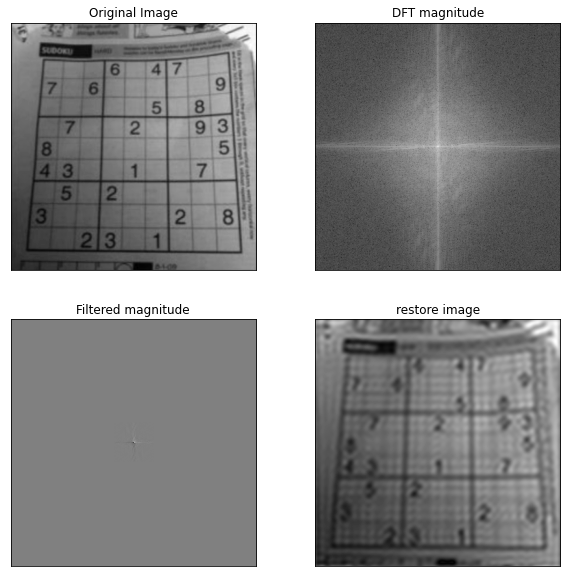

In [22]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
# 이미지 읽기
!curl -L https://github.com/swkim01/DSAC5/raw/main/data/sdk.png -o sdk.png
img = cv.imread('./sdk.png',0)
#img = cv.imread('/content/sample_data/sdk.png',0)
img = img / 255

# DFT
fft = cv.dft(img, flags=cv.DFT_COMPLEX_OUTPUT)

# spectrum visualization
shifted = np.fft.fftshift(fft, axes=[0,1])
magnitude = cv.magnitude(shifted[:,:,0], shifted[:,:,1])
magnitude = np.log(magnitude)

# LPF
h, w = img.shape
ch, cw = round(h/2), round(w/2)
mask = np.zeros((h,w,2),np.uint8)
mask[ch-30:ch+30, cw-30:cw+30] = 1
fshift = shifted*mask
f_ishift = np.fft.ifftshift(fshift)

# restore
restore = cv.idft(fshift)
restore = cv.magnitude(restore[:,:,0],restore[:,:,1])

titles = ['Original Image', 'DFT magnitude', 'Filtered magnitude', 'restore image']
images = [img, magnitude, fshift[:,:,1], restore]
#fig = plt.figure(figsize=(20,10))
fig, ax = plt.subplots(2, 2, figsize=(10,10))
for i in range(4):
    #ax = fig.add_subplot(2,2,i+1)
    #ax.imshow(images[i],cmap = 'gray')
    #ax.set_title(titles[i]), ax.set_xticks([]), ax.set_yticks([])
    x = int(i/2); y = int(i%2)
    ax[x,y].imshow(images[i],cmap = 'gray')
    ax[x,y].set_title(titles[i]), ax[x,y].set_xticks([]), ax[x,y].set_yticks([])
plt.show()